# Manipulação de Dados em Python Usando Pandas (Parte 2)<a id='home'></a>

Arquivos Necessarios = `gdp_components.csv`; `debt.xlsx`

A maioria dos dados reside em arquivos, geralmente como arquivos de texto, valores separados por vírgulas ou como pastas de trabalho do MS Excel em nossos computadores ou na nuvem. **Neste notebook, aprenderemos como inserir e retirar dados do Pandas.**

Links:

[gdp_components](https://drive.google.com/file/d/1-7B-B5XE1qIrL5Z5K1Mtfy0vxoVygGsX/view)

[debt](https://docs.google.com/spreadsheets/d/1rAhe7r6a9ChoMkozy9NJTFCGZjrj1dYj/edit#gid=114022145)

Roteiro de Palestra:

1. [Lendo arquivos csv do seu computador](#csv)
2. [Lendo planilhas do Excel do seu computador](#excel)
3. [Lendo arquivos da Internet](#internet)

## 1. Lendo do seu computador<a id="csv"></a> [(retornar ao início)](#home)

Vamos começar obtendo arquivos de nossos próprios computadores. Começamos carregando Pandas. Também estamos carregando o pacote os onde `os` significa 'sistema operacional' e contém funções que nos ajudam a navegar na estrutura de arquivos de nossos computadores.  

In [102]:
import pandas as pd     # importação do pacote pandas
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import re
import os               # pacote os

Se você ainda não o fez, mova o arquivo `gdp_components.csv` para sua unidade local e coloque-o na mesma pasta que contém este notebook. Esperamos que este arquivo contenha o PIB dos EUA e seus principais componentes. Vamos ver.

In [103]:
gdp = pd.read_csv('/content/gdp_components - gdp_components.csv')       # read_csv é um metodo do Pandas
print(type(gdp))

<class 'pandas.core.frame.DataFrame'>


O método `read_csv()` pega uma string com o nome do arquivo e cria um DataFrame. Vamos dar uma olhada nos dados.

In [104]:
print(gdp)

          DATE        GDPA      GPDIA       GCEA     EXPGSA     IMPGSA
0   1929-01-01     104.556      17.17      9.622      5.939      5.556
1   1930-01-01       92.16     11.428     10.273      4.444      4.121
2   1931-01-01      77.391      6.549     10.169      2.906      2.905
3   1932-01-01      59.522      1.819      8.946      1.975      1.932
4   1933-01-01      57.154      2.276      8.875      1.987      1.929
..         ...         ...        ...        ...        ...        ...
84  2013-01-01  16.784.851  2.826.013  3.132.409  2.273.428    2764.21
85  2014-01-01  17.521.747  3.038.931  3.167.041  2.371.027  2.879.284
86  2015-01-01  18.219.297  3.211.971    3234.21  2.265.047  2.786.461
87  2016-01-01  18.707.189  3.169.887  3.290.979  2.217.576  2.738.146
88  2017-01-01  19.485.394  3.367.965  3.374.444  2.350.175  2.928.596

[89 rows x 6 columns]


Mesmo que o notebook jupyter tenha escondido as linhas 30-58, isso ainda é um pouco dificil de compreender. Podemos usar os métodos `head()` e `tail()` do DataFrame para espiar apenas as primeiras ou últimas linhas.

In [105]:
print( gdp.head(4) )            # Mostra as primeiras 4 linhas

         DATE     GDPA   GPDIA    GCEA EXPGSA IMPGSA
0  1929-01-01  104.556   17.17   9.622  5.939  5.556
1  1930-01-01    92.16  11.428  10.273  4.444  4.121
2  1931-01-01   77.391   6.549  10.169  2.906  2.905
3  1932-01-01   59.522   1.819   8.946  1.975  1.932


Se você não passar um argumento `head()` ou `tail()`, o padrão é 5 linhas.

In [106]:
gdp.tail() #exibe as ultimas 5 linhas sem chamar o método Print

,DATE,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
84,2013-01-01,16.784.851,2.826.013,3.132.409,2.273.428,2764.21
85,2014-01-01,17.521.747,3.038.931,3.167.041,2.371.027,2.879.284
86,2015-01-01,18.219.297,3.211.971,3234.21,2.265.047,2.786.461
87,2016-01-01,18.707.189,3.169.887,3.290.979,2.217.576,2.738.146
88,2017-01-01,19.485.394,3.367.965,3.374.444,2.350.175,2.928.596


Observe que não precisamos da instrução print para usar `head()` ou `tail()`. Talvez você não queira ver o começo ou o fim, mas sim uma amostra aleatória. Use o método `sample`; por exemplo.,

In [107]:
gdp.sample(10)  # Exibe uma amostra aleatória de 10 observações

,DATE,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
57,1986-01-01,4.579.631,849.146,976.076,320.998,452.867
78,2007-01-01,14451.86,2.673.011,2.790.844,1.660.853,2379.28
65,1994-01-01,7.287.236,1.256.484,1.402.274,720.937,813.424
58,1987-01-01,4.855.215,892.176,1031.53,363.943,508.713
15,1944-01-01,224.447,9.18,108.643,4.88,6.904
56,1985-01-01,4.338.979,829.65,910.516,303.211,417.229
52,1981-01-01,3.207.042,631.229,654.381,305.239,317.758
70,1999-01-01,9.630.663,1.887.059,1720.36,992.778,1.248.612
48,1977-01-01,2.081.826,396.613,434.331,159.349,182.443
9,1938-01-01,87.352,7.944,14.17,3.811,2.845


O índice não é muito sensato. Estes são dados de séries temporais (a unidade de observação é um ano), então a data parece um bom índice. Como definimos o índice?

In [108]:
gdp_new_index = gdp.set_index('DATE')   # podemos usar 'inplace = True' se não quisermos criar uma cópia

gdp_new_index.head()

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1929-01-01,104.556,17.17,9.622,5.939,5.556
1930-01-01,92.16,11.428,10.273,4.444,4.121
1931-01-01,77.391,6.549,10.169,2.906,2.905
1932-01-01,59.522,1.819,8.946,1.975,1.932
1933-01-01,57.154,2.276,8.875,1.987,1.929


In [109]:
"""
Se apenas fizermos uma "gambiarra" para setar a coluna DATE como índice, corremos
o risco de gerar erros e mais trabalhos em nossas análises, pois os valores de
índices estão como 'str', e não como um objeto date ou datetime.
"""
type(gdp_new_index.index.to_list()[0])

str

Também podemos definir o índice conforme lemos no arquivo. Vamos dar uma olhada nos detalhes de `read_csv()`.

In [110]:
# Args importantes: index_col e parse_dates
pd.read_csv?

Algumas flags interessantes: `index_col`, `usecols`, `header`, `sep`,... Ao ler arquivos confusos, esses argumentos extras podem ser úteis.

Vamos tentar `index_col`.

In [111]:
# Usa a primeira coluna como índice
# Nesse caso, tratamos o próprio csv como dataframe
# a contagem de colunas sempre começa com zero
gdp_2 = pd.read_csv('/content/gdp_components - gdp_components.csv', index_col = 0, parse_dates=True)    

In [112]:
gdp_2.head()

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1929-01-01,104.556,17.17,9.622,5.939,5.556
1930-01-01,92.16,11.428,10.273,4.444,4.121
1931-01-01,77.391,6.549,10.169,2.906,2.905
1932-01-01,59.522,1.819,8.946,1.975,1.932
1933-01-01,57.154,2.276,8.875,1.987,1.929


In [113]:
# Agora sim temos índices que estão no formato apropriado de datas do pandas
type(gdp_2.index.to_list()[0])

pandas._libs.tslibs.timestamps.Timestamp

In [114]:
print(gdp_2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 1929-01-01 to 2017-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GDPA    89 non-null     object
 1   GPDIA   89 non-null     object
 2   GCEA    89 non-null     object
 3   EXPGSA  89 non-null     object
 4   IMPGSA  89 non-null     object
dtypes: object(5)
memory usage: 4.2+ KB
None


In [115]:
# Replace dot char by nothing at 'c' occurances
string = '1.23456.677'
result = string.replace('.', '', 2)
print(result)
print(type(result))
print(float(result))

123456677
<class 'str'>
123456677.0


In [116]:
def convert_string_with_dots_to_float(strings):
  results = []
  for string in strings:
    result = string.replace('.', '')
    float_result = int(result)
    results.append(float_result)
  return results

In [117]:
strings = ['1.345.565', '1.232', '1.322.434']
ans = convert_string_with_dots_to_float(strings)
print(type(ans[0]))

<class 'int'>


In [118]:
gdp_2['GDPA'] = convert_string_with_dots_to_float(gdp_2['GDPA'])
gdp_2['GPDIA'] = convert_string_with_dots_to_float(gdp_2['GPDIA'])
gdp_2['GCEA'] = convert_string_with_dots_to_float(gdp_2['GCEA'])
gdp_2['EXPGSA'] = convert_string_with_dots_to_float(gdp_2['EXPGSA'])
gdp_2['IMPGSA'] = convert_string_with_dots_to_float(gdp_2['IMPGSA'])

In [119]:
print(gdp_2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 1929-01-01 to 2017-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GDPA    89 non-null     int64
 1   GPDIA   89 non-null     int64
 2   GCEA    89 non-null     int64
 3   EXPGSA  89 non-null     int64
 4   IMPGSA  89 non-null     int64
dtypes: int64(5)
memory usage: 4.2 KB
None


In [128]:
gdp_2.columns

Index(['GDPA', 'GPDIA', 'GCEA', 'EXPGSA', 'IMPGSA'], dtype='object')

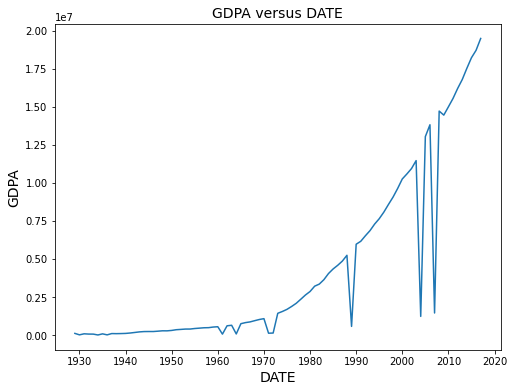

In [120]:
plt.figure(figsize=(8, 6))
plt.title('GDPA versus DATE', fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('GDPA', fontsize=14)

sns.lineplot(data=gdp_2, x=gdp_2.index, y='GDPA')

plt.show()

In [129]:
gdp_2.sort_values(by='GDPA').head() # As 5 datas com menores GDPA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1934-01-01,668,4296,10721,2561,2239
1936-01-01,8483,9391,13398,3007,3154
1930-01-01,9216,11428,10273,4444,4121
1961-01-01,56221,86584,129237,27602,22688
1933-01-01,57154,2276,8875,1987,1929


In [130]:
gdp_2.sort_values(by='GDPA').tail() # As 5 datas com maiores GDPA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
2013-01-01,16784851,2826013,3132409,2273428,276421
2014-01-01,17521747,3038931,3167041,2371027,2879284
2015-01-01,18219297,3211971,323421,2265047,2786461
2016-01-01,18707189,3169887,3290979,2217576,2738146
2017-01-01,19485394,3367965,3374444,2350175,2928596


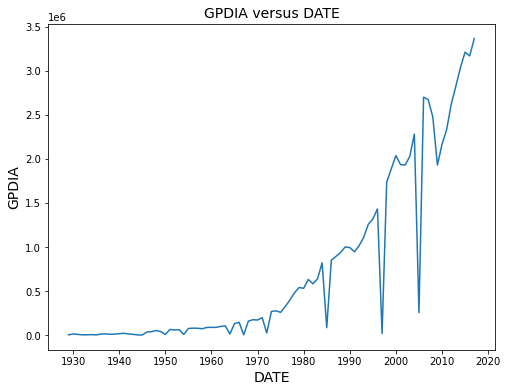

In [131]:
plt.figure(figsize=(8, 6))
plt.title('GPDIA versus DATE', fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('GPDIA', fontsize=14)

sns.lineplot(data=gdp_2, x=gdp_2.index, y='GPDIA')

plt.show()

In [133]:
gdp_2.sort_values(by='GPDIA').head() # As 5 datas com menores GPDIA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1945-01-01,228007,124,96396,6781,7547
1935-01-01,74241,737,11151,2769,2982
1944-01-01,224447,918,108643,488,6904
1967-01-01,859958,1427,207018,43467,39912
1929-01-01,104556,1717,9622,5939,5556


In [134]:
gdp_2.sort_values(by='GPDIA').tail() # As 5 datas com maiores GPDIA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
2013-01-01,16784851,2826013,3132409,2273428,276421
2014-01-01,17521747,3038931,3167041,2371027,2879284
2016-01-01,18707189,3169887,3290979,2217576,2738146
2015-01-01,18219297,3211971,323421,2265047,2786461
2017-01-01,19485394,3367965,3374444,2350175,2928596


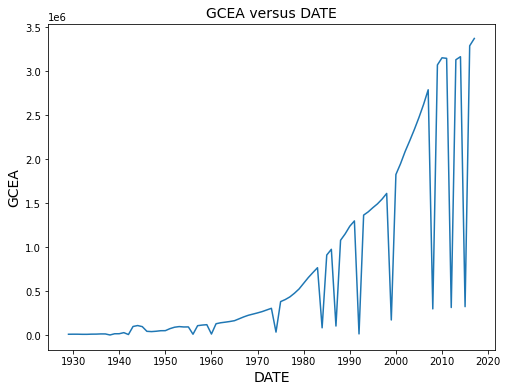

In [137]:
plt.figure(figsize=(8, 6))
plt.title('GCEA versus DATE', fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('GCEA', fontsize=14)

sns.lineplot(data=gdp_2, x=gdp_2.index, y='GCEA')

plt.show()

In [139]:
gdp_2.sort_values(by='GCEA').head() # As 5 datas com menores GCEA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1938-01-01,87352,7944,1417,3811,2845
1942-01-01,165952,11762,6544,4375,4627
1933-01-01,57154,2276,8875,1987,1929
1932-01-01,59522,1819,8946,1975,1932
1929-01-01,104556,1717,9622,5939,5556


In [141]:
gdp_2.sort_values(by='GCEA').tail() # As 5 datas com maiores GCEA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
2011-01-01,15542582,2332562,3148372,2102995,2682456
2010-01-01,14992052,2165473,3154647,184628,2360183
2014-01-01,17521747,3038931,3167041,2371027,2879284
2016-01-01,18707189,3169887,3290979,2217576,2738146
2017-01-01,19485394,3367965,3374444,2350175,2928596


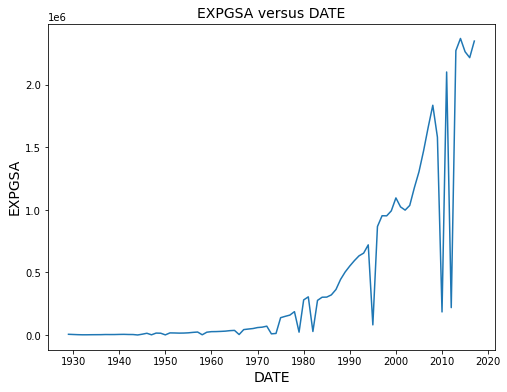

In [142]:
plt.figure(figsize=(8, 6))
plt.title('EXPGSA versus DATE', fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('EXPGSA', fontsize=14)

sns.lineplot(data=gdp_2, x=gdp_2.index, y='EXPGSA')

plt.show()

In [143]:
gdp_2.sort_values(by='EXPGSA').head() # As 5 datas com menores EXPGSA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1944-01-01,224447,918,108643,488,6904
1950-01-01,299827,5653,50515,1235,11612
1947-01-01,249616,37131,39827,1874,7933
1932-01-01,59522,1819,8946,1975,1932
1933-01-01,57154,2276,8875,1987,1929


In [144]:
gdp_2.sort_values(by='EXPGSA').tail() # As 5 datas com maiores EXPGSA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
2016-01-01,18707189,3169887,3290979,2217576,2738146
2015-01-01,18219297,3211971,323421,2265047,2786461
2013-01-01,16784851,2826013,3132409,2273428,276421
2017-01-01,19485394,3367965,3374444,2350175,2928596
2014-01-01,17521747,3038931,3167041,2371027,2879284


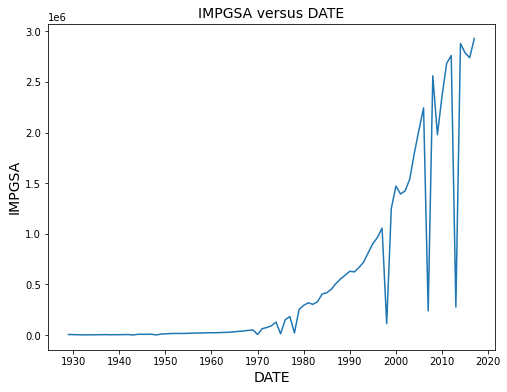

In [145]:
plt.figure(figsize=(8, 6))
plt.title('IMPGSA versus DATE', fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('IMPGSA', fontsize=14)

sns.lineplot(data=gdp_2, x=gdp_2.index, y='IMPGSA')

plt.show()

In [147]:
gdp_2.sort_values(by='IMPGSA').head() # As 5 datas com menores IMPGSA's

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1943-01-01,203084,7405,98023,4034,628
1948-01-01,274468,50347,43755,15547,1006
1933-01-01,57154,2276,8875,1987,1929
1932-01-01,59522,1819,8946,1975,1932
1934-01-01,668,4296,10721,2561,2239


In [148]:
gdp_2.sort_values(by='IMPGSA').tail() # As 5 datas com maiores IMPGSA

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
2016-01-01,18707189,3169887,3290979,2217576,2738146
2012-01-01,16197007,2621754,313701,219128,2759851
2015-01-01,18219297,3211971,323421,2265047,2786461
2014-01-01,17521747,3038931,3167041,2371027,2879284
2017-01-01,19485394,3367965,3374444,2350175,2928596


## Visualizando Covariâncias e Espalhamentos dos dados

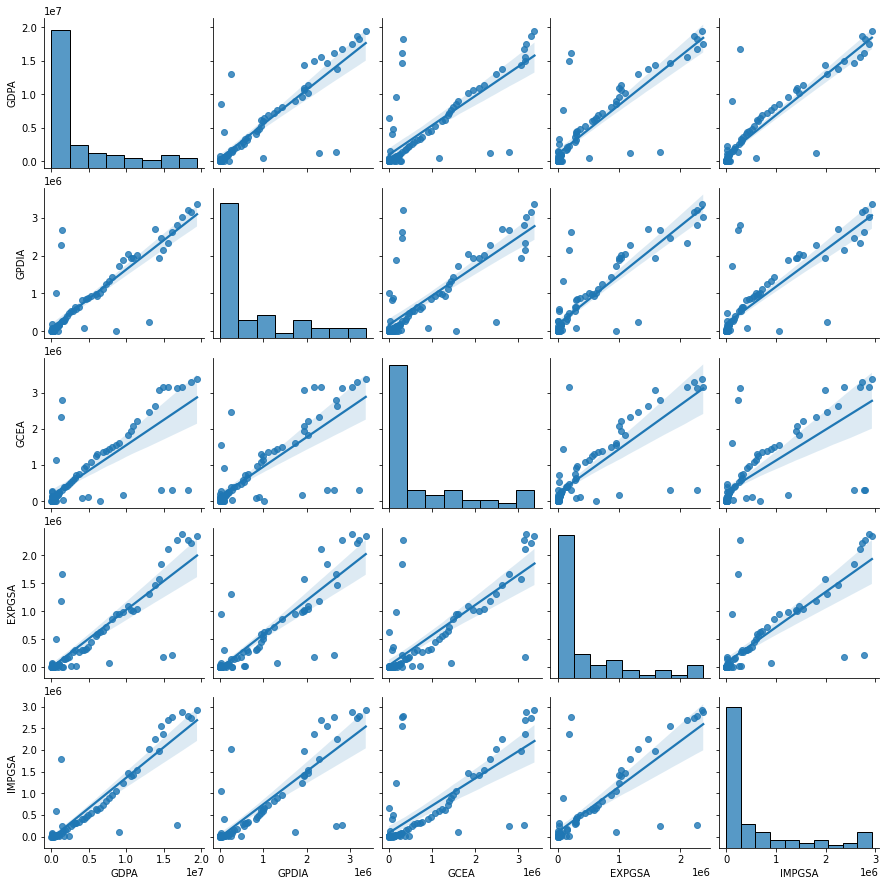

In [150]:
sns.pairplot(gdp_2, kind='reg')

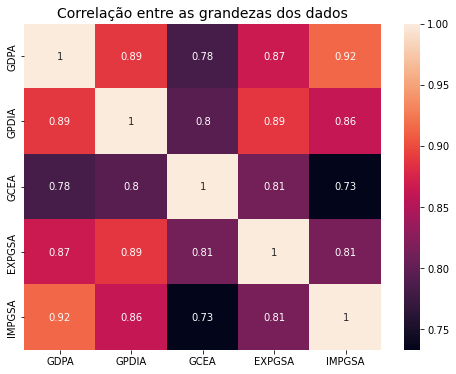

In [155]:
correlationship = gdp_2.corr()

plt.figure(figsize=(8, 6))
plt.title('Correlação entre as grandezas dos dados', fontsize=14)
sns.heatmap(correlationship, annot=True)

plt.show()

Portanto, pelo gráfico acima podemos perceber que há uma alta correlação positiva entre todas as grandezas do dataset.

### Navegando em sua estrutura de arquivos

Nós despejamos nosso arquivo em nosso **diretório de trabalho atual** para que pudéssemos pedir o nome do arquivo `gdp_components.csv` em `read_csv()`. Qual é o nosso diretório de trabalho atual (cwd)?

In [156]:
path_to_cwd = os.getcwd()
print(path_to_cwd)

/content


Quando demos a `read_csv()` o nome de arquivo 'gpd_components.csv', ele procurou em nosso cwd pelo arquivo. Vamos tentar algo mais complicado. Crie uma nova pasta chamada 'Data_Files' dentro do workspace do Colab. Faça uma cópia do arquivo gdp_components e cole-o na 'pasta Data_Files'. Renomeie o arquivo `gdp_components_moved.csv`.

In [158]:
gdp_moved = pd.read_csv('/content/Data_Files/gdp_components_moved')

Claro que isso não funciona. O arquivo não está em nosso diretório. É bom ver como é esse tipo de mensagem de erro. Precisamos passar csv_read() o *caminho* para o arquivo. O caminho é a hierarquia de pastas que contém o arquivo.


Observe que há um `\` cada vez que listamos uma nova pasta. Também podemos usar `.\` onde o ponto significa o diretório raíz. Como uma exceção, o Windows usa barras invertidas para caminhos, enquanto praticamente todos os outros (por exemplo, Apple, Linux, Unix) usam barras.

Poderíamos ter manipulado algumas strings para chegar a isso também. Essa abordagem pode ser útil se você precisar ler muitos arquivos no mesmo local. Talvez usando um `for loop` sobre uma lista de nomes de arquivos?

In [160]:
path_to_cwd = os.getcwd()
file_name = 'gdp_components_moved.csv'
path_to_data_file = path_to_cwd + '/Data_Files/' +  file_name
print(path_to_data_file)

/content/Data_Files/gdp_components_moved.csv


In [162]:
gdp_moved = pd.read_csv(path_to_data_file, index_col=0)
gdp_moved.head()

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1929-01-01,104.556,17.17,9.622,5.939,5.556
1930-01-01,92.16,11.428,10.273,4.444,4.121
1931-01-01,77.391,6.549,10.169,2.906,2.905
1932-01-01,59.522,1.819,8.946,1.975,1.932
1933-01-01,57.154,2.276,8.875,1.987,1.929


Note that the file path uses both backlashes and forward slashes (ie, I mixed them). Windows will actually recognize both -- hence, we were able to load the file with this combination.

### <font color='orange'>Prática</font>
Reserve alguns minutos e tente o seguinte:

1. Experimente o método `to_csv()` do DataFrame. Salve `gdp_moved` como 'gdp_moved_2.csv' em seu diretorio raiz. \[Você pode usar `?` se precisar de ajuda.\] 


In [165]:
gdp_moved.to_csv('gdp_moved_2.csv')

2. Use `to_csv()` novamente para salvar `gdp_moved` na pasta Data_Files. Nomeie-o como 'gdp_moved_3.csv'

In [170]:
gdp_moved.to_csv(path_or_buf='/content/Data_Files/gdp_moved_3.csv')

Seus arquivos estão nos lugares corretos?

Isso não deveria ser uma prática de leitura em arquivos CSV? Certo. Vamos fazer um pouco disso.

3. Use gdp_moved_3.csv para criar um DataFrame chamado gdp_growth. Defina o índice para as datas. Imprima os primeiros 10 anos de dados.

In [172]:
gdp_growth = pd.read_csv('/content/Data_Files/gdp_moved_3.csv', index_col='DATE', parse_dates=True)
gdp_growth.head(10)

,GDPA,GPDIA,GCEA,EXPGSA,IMPGSA
DATE,,,,,
1929-01-01,104.556,17.17,9.622,5.939,5.556
1930-01-01,92.16,11.428,10.273,4.444,4.121
1931-01-01,77.391,6.549,10.169,2.906,2.905
1932-01-01,59.522,1.819,8.946,1.975,1.932
1933-01-01,57.154,2.276,8.875,1.987,1.929
1934-01-01,66.8,4.296,10.721,2.561,2.239
1935-01-01,74.241,7.37,11.151,2.769,2.982
1936-01-01,84.83,9.391,13.398,3.007,3.154
1937-01-01,93.003,12.967,13.119,4.039,3.961


4. Renomeie 'GDPA' para 'gdp' e renomeie 'GCEA' para 'gov'.

In [174]:
gdp_growth.rename(columns={'GDPA': 'gdp', 'GCEA': 'gov'}, inplace=True) 
gdp_growth.head(10)

,gdp,GPDIA,gov,EXPGSA,IMPGSA
DATE,,,,,
1929-01-01,104.556,17.17,9.622,5.939,5.556
1930-01-01,92.16,11.428,10.273,4.444,4.121
1931-01-01,77.391,6.549,10.169,2.906,2.905
1932-01-01,59.522,1.819,8.946,1.975,1.932
1933-01-01,57.154,2.276,8.875,1.987,1.929
1934-01-01,66.8,4.296,10.721,2.561,2.239
1935-01-01,74.241,7.37,11.151,2.769,2.982
1936-01-01,84.83,9.391,13.398,3.007,3.154
1937-01-01,93.003,12.967,13.119,4.039,3.961


## 2. Trabalhando com planilhas do Excel do seu computador<a id="excel"></a> [(retornar ao início)](#home)

Ler planilhas não é muito diferente de ler arquivos csv. Mas, como as pastas de trabalho são mais complicadas do que os arquivos csv, temos mais algumas opções a serem consideradas.

Se você ainda não o fez, copie `debt.xlsx` para o seu diretório raíz do Colab. Vamos abri-lo no Excel e dar uma olhada nele...

Há muita coisa acontecendo aqui: dados ausentes, algumas coisas #N/A e várias linhas de cabeçalho. Vamos ao trabalho.

In [175]:
debt = pd.read_excel('/content/debt.xlsx')
debt

,FRED Graph Observations,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Federal Reserve Economic Data,NaN,NaN,NaN
1,Link: https://fred.stlouisfed.org,NaN,NaN,NaN
2,Help: https://fred.stlouisfed.org/help-faq,NaN,NaN,NaN
3,Economic Research Division,NaN,NaN,NaN
4,Federal Reserve Bank of St. Louis,NaN,NaN,NaN
...,...,...,...,...
97,2014-01-01 00:00:00,17521.747,17799837,2.53956
98,2015-01-01 00:00:00,18219.297,18344212.75,2.138287
99,2016-01-01 00:00:00,18707.189,19549200.5,1.83744
100,2017-01-01 00:00:00,19485.394,20107155.25,2.32948


Se você abrir o arquivo excel, notará que as primeiras linhas são apenas uma descrição do arquivo de dados. Os dados reais não começam até a 12ª linha que lista os nomes das variáveis. Nós não precisamos disso, então vamos usar o argumento `header` para dizer ao python qual linha usar como os nomes das colunas.

In [176]:
debt = pd.read_excel('debt.xlsx', header = 12)

print(debt.head())
print('\n')
print(debt.tail())

  observation_date     GDPA  GFDEBTN  DGS10
0       1929-01-01  104.556      NaN    NaN
1       1930-01-01   92.160      NaN    NaN
2       1931-01-01   77.391      NaN    NaN
3       1932-01-01   59.522      NaN    NaN
4       1933-01-01   57.154      NaN    NaN


   observation_date       GDPA      GFDEBTN     DGS10
85       2014-01-01  17521.747  17799837.00  2.539560
86       2015-01-01  18219.297  18344212.75  2.138287
87       2016-01-01  18707.189  19549200.50  1.837440
88       2017-01-01  19485.394  20107155.25  2.329480
89       2018-01-01        NaN          NaN       NaN


Isso parece bom. Observe que o Pandas adicionou NaN para os dados ausentes e para as entradas #N\A. Teremos que lidar com isso em algum momento. O parâmetro header também faz parte de `read_csv()`.

Não especificamos qual planilha na pasta de trabalho carregar, então o Pandas pegou a primeira. Podemos identificar as pastas de trabalho pelo argumento `sheet_name`.

In [177]:
debt_q = pd.read_excel('debt.xlsx', header=12, sheet_name='quarterly')
print(debt_q.head())
print('\n')
print(debt_q.tail())

  observation_date  GFDEBTN  DGS10      GDP
0       1947-01-01      NaN    NaN  243.164
1       1947-04-01      NaN    NaN  245.968
2       1947-07-01      NaN    NaN  249.585
3       1947-10-01      NaN    NaN  259.745
4       1948-01-01      NaN    NaN  265.742


    observation_date     GFDEBTN     DGS10        GDP
281       2017-04-01  19844554.0  2.260952  19359.123
282       2017-07-01  20244900.0  2.241429  19588.074
283       2017-10-01  20492747.0  2.371452  19831.829
284       2018-01-01  21089643.0  2.758525  20041.047
285       2018-04-01  21195070.0  2.920625  20411.924


Podemos pedir apenas um subconjunto das colunas ao ler em um arquivo (csv ou xlsx). Use o argumento `usecols` que recebe uma lista de números de coluna como entrada. Essa lista aceita números inteiros ou letras de coluna do Excel.

In [178]:
# Utilizar as colunas 1 a 3 da pasta 'quarterly'
interest_rates = pd.read_excel('debt.xlsx', header=12,  sheet_name='quarterly', usecols=range(0,3))  
print(interest_rates.head())
print('\n')

# Utilizar as colunas 1 e 3 da pasta 'quarterly' passando o numero das colunas como lista
interest_rates = pd.read_excel('debt.xlsx', header=12,  sheet_name='quarterly', usecols=[0,2])  
print(interest_rates.head())
print('\n')

# Utilizar as colunas 1 e 3 da pasta 'quarterly' passando o índice do Excel em letras
interest_rates = pd.read_excel('debt.xlsx', header=12,  sheet_name='quarterly', usecols="A,C")  
print(interest_rates.head())

  observation_date  GFDEBTN  DGS10
0       1947-01-01      NaN    NaN
1       1947-04-01      NaN    NaN
2       1947-07-01      NaN    NaN
3       1947-10-01      NaN    NaN
4       1948-01-01      NaN    NaN


  observation_date  DGS10
0       1947-01-01    NaN
1       1947-04-01    NaN
2       1947-07-01    NaN
3       1947-10-01    NaN
4       1948-01-01    NaN


  observation_date  DGS10
0       1947-01-01    NaN
1       1947-04-01    NaN
2       1947-07-01    NaN
3       1947-10-01    NaN
4       1948-01-01    NaN


## 3. Lendo arquivos da Internet<a id="internet"></a> [(retornar ao início)](#home)

Também podemos passar urls de funções `read`.

In [179]:
# Lendo a tablea penn world
url = "http://www.rug.nl/ggdc/docs/pwt81.xlsx"
pwt = pd.read_excel(url, sheet_name= "Data")
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,AGO,Angola,Kwanza,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Kwanza,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,Kwanza,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Angola,Kwanza,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Kwanza,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Isso levou alguns segundos --- deve ser um arquivo bem grande. Vamos usar o método `info` para ver quão grande:


In [180]:
pwt.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Columns: 47 entries, countrycode to pl_k
dtypes: float64(39), int64(1), object(7)
memory usage: 3.7+ MB


In [183]:
print(pwt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    10357 non-null  object 
 1   country        10357 non-null  object 
 2   currency_unit  10357 non-null  object 
 3   year           10357 non-null  int64  
 4   rgdpe          8278 non-null   float64
 5   rgdpo          8278 non-null   float64
 6   pop            8278 non-null   float64
 7   emp            7217 non-null   float64
 8   avh            2516 non-null   float64
 9   hc             6930 non-null   float64
 10  ccon           8278 non-null   float64
 11  cda            8278 non-null   float64
 12  cgdpe          8278 non-null   float64
 13  cgdpo          8278 non-null   float64
 14  ck             8278 non-null   float64
 15  ctfp           5246 non-null   float64
 16  cwtfp          5246 non-null   float64
 17  rgdpna         8278 non-null   float64
 18  rconna

In [184]:
# Contando quantos valores NaN estão presentes em cada coluna
missing_val_count_by_column = (pwt.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

rgdpe        2079
rgdpo        2079
pop          2079
emp          3140
avh          7841
hc           3427
ccon         2079
cda          2079
cgdpe        2079
cgdpo        2079
ck           2079
ctfp         5111
cwtfp        5111
rgdpna       2079
rconna       2079
rdana        2079
rkna         2079
rtfpna       5111
rwtfpna      5111
labsh        3954
delta        2246
xr           2079
pl_con       2079
pl_da        2079
pl_gdpo      2079
i_cig        2079
i_xm         2079
i_xr         2079
i_outlier    2079
cor_exp      9924
statcap      9270
csh_c        2079
csh_i        2079
csh_g        2079
csh_x        2079
csh_m        2079
csh_r        2079
pl_c         2079
pl_i         2079
pl_g         2079
pl_x         2079
pl_m         2079
pl_k         2079
dtype: int64


Vamos fazer isso de novo. Desta vez, use dados do livro de McKinney, onde cada observação contém contagens de nomes de bebês por um ano.

In [181]:
baby_url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames'

# Qual era a tendência em 1880?
old_names = pd.read_csv(baby_url + '/yob1880.txt')
old_names.head()

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


'Mary' como um nome de variável? Rui Ro. Perdemos 'Mary', que parece bastante popular. O que aconteceu? Os dados brutos não contêm nomes de variáveis. Precisamos dizer aos pandas para não procurarem por nomes de variáveis.

Não podemos especificar nenhum cabeçalho com a palavra-chave `None`.

In [182]:
old_names = pd.read_csv(baby_url + '//yob1880.txt', header=None)
old_names.head()

,0,1,2
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
